In [12]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

ecdatabase = database.Database(file)
ecdatabase.create_anisotropic_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('clinopyroxene')
model_names

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


['xu_1999_cpx',
 'huebner88_dk7_cpx[100]',
 'huebner88_dk7_cpx[010]',
 'huebner88_dk7_cpx[001]',
 'huebner88_mal_cpx[100]',
 'huebner88_mal_cpx[010]',
 'ymcc_12_dry_cpx',
 'ymcc_12_wet_cpx',
 'yang_12b_cpx[100]',
 'yang_12b_cpx[010]',
 'yang_12b_cpx[001]',
 'yang_11b_dry_cpx',
 'yang_11b_wet_cpx',
 'yang_11b_nat_cpx',
 'isotropic_model:huebner88_dk7_cpx[100]+huebner88_dk7_cpx[010]+huebner88_dk7_cpx[001]',
 'isotropic_model:huebner88_mal_cpx[100]+huebner88_mal_cpx[010]',
 'isotropic_model:yang_12b_cpx[100]+yang_12b_cpx[010]+yang_12b_cpx[001]']

# Exploring Pyrrhenious's Plagioclaise Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

 * Yousheng Xu and Thomas J. Shankland 1999. Electrical conductivity of orthopyroxene and its high pressure phases
  
 * J.Stephen Huebner and Donald E. Voight 1988. Electrical conductivity of diopside: Evidence for oxygen vacancies 
 
 * Yang X. et al. 2011. Effect of water on the electrical conductivity of lower crustal clinopyroxene
 
 * Xiaozhi Yang and Catherine McCammon 2012. Fe3+-rich augite and high electrical conductivity in the deep lithosphere
  
 * Yang X. 2012. Orientation-related electrical conductivity of hydrous olivine, clinopyroxene and plagioclase and implications for the structure of the lower continental crust and uppermost mantle
 
 Yang X et al. 2011 Equations appear to be higher than their fits, but not overly so. Yang and McCammon 2012 the water exponent is increased from 0.94 to 0.97 to fit the graph. Yang X. 2012 the preexponential constants for cpx had to be adjusted up between 0.02-0.07 to match the figure.

## Huebner and Voight 1988. At QFM. 

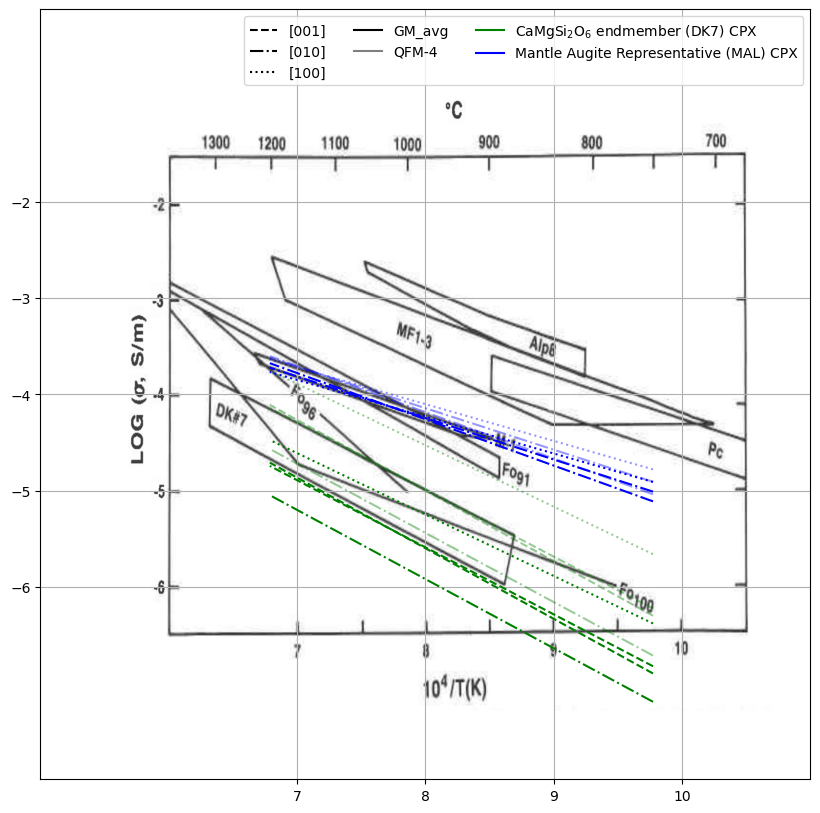

In [2]:
huebner_models = ['huebner88_dk7_cpx[100]',
 'huebner88_dk7_cpx[010]',
 'huebner88_dk7_cpx[001]',
 'huebner88_mal_cpx[100]',
 'huebner88_mal_cpx[010]',
 'isotropic_model:huebner88_dk7_cpx[100]+huebner88_dk7_cpx[010]+huebner88_dk7_cpx[001]',
 'isotropic_model:huebner88_mal_cpx[100]+huebner88_mal_cpx[010]']

water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(huebner_models[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in huebner_models:
        ecmodel = ecdatabase.get_model(model_name)
        if 'dk7' in model_name:
            color='green'
        else:
            color='blue'
        if '001' in model_name:
            linestyle='--'
        elif '010' in model_name:
            linestyle='-.'
        elif '100' in model_name:
            linestyle=':'
        elif 'aniso' in model_name:
            linestyle='-'
        c = ecmodel.get_conductivity(T=temperature_range,logfo2=logfo2)
        ax.plot(1e4/temperature_range,
        np.log10(c),linestyle=linestyle,color=color)
        c = ecmodel.get_conductivity(T=temperature_range,logfo2=logfo2-4)
        ax.plot(1e4/temperature_range,
        np.log10(c),linestyle=linestyle,color=color,alpha=0.4)

plt.plot([],[],linestyle='--',label='[001]',color='black')
plt.plot([],[],linestyle='-.',label='[010]',color='black')

plt.plot([],[],linestyle=':',label='[100]',color='black')
plt.plot([],[],linestyle='-',label='GM_avg',color='black')
plt.plot([],[],linestyle='-',label='QFM-4',color='black',alpha=0.5)

plt.plot([],[],label=r'CaMgSi$_2$O$_6$ endmember (DK7) CPX',color='green')
plt.plot([],[],label='Mantle Augite Representative (MAL) CPX',linestyle='-',color='blue')
        
plt.xlim([5,11])
plt.ylim([-8,0])
plt.legend(ncols=3)

## Xu and Shankland 1999

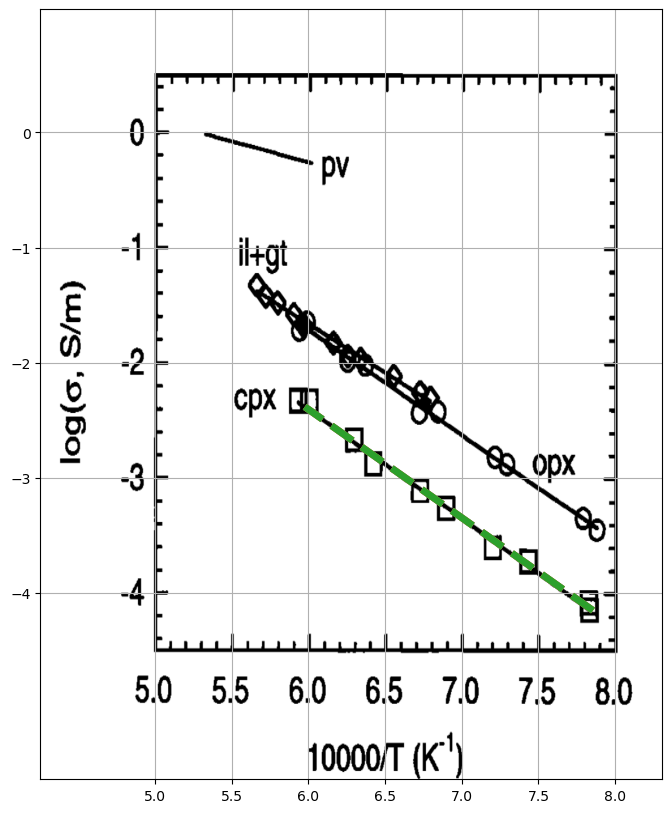

In [6]:
model = 'xu_1999_cpx'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in [0,135,890]:
        conductivity = model.get_conductivity(T=temperature_range,Cw=water)
        ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5)
    

## Yang X. et al. 2011

Provided constants do not exactly match graph.

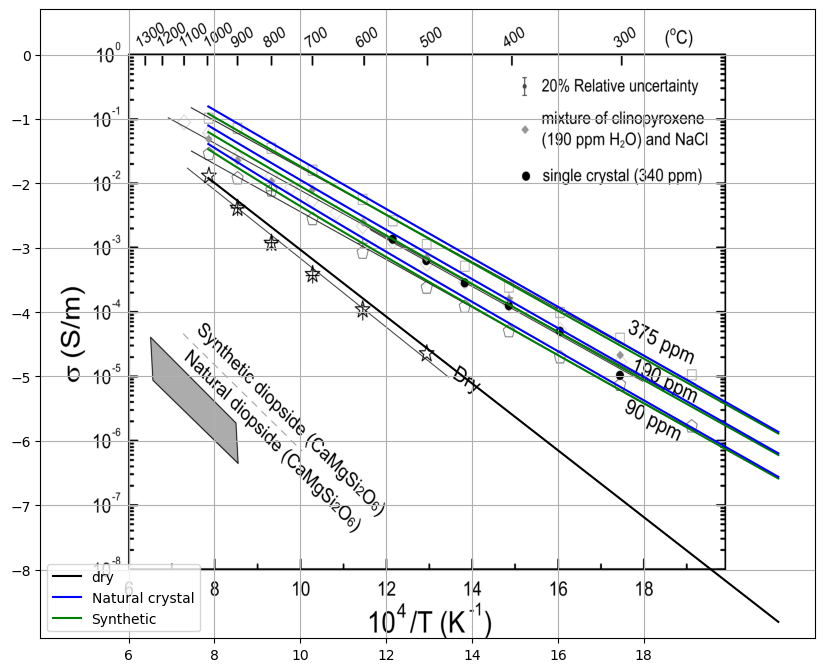

In [8]:
yc_models = ['yang_11b_dry_cpx',
 'yang_11b_wet_cpx',
 'yang_11b_nat_cpx']

water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(yc_models[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in yc_models:
        ecmodel = ecdatabase.get_model(model_name)
        if 'dry' in model_name:
            c = ecmodel.get_conductivity(T=temperature_range)
            ax.plot(1e4/temperature_range,
            np.log10(c),color='black')
        else:
            if 'nat' in model_name:
                color='blue'
            else:
                color='green'
            for w in [90,190,375]: 
                c = ecmodel.get_conductivity(T=temperature_range,Cw=w)
                ax.plot(1e4/temperature_range,
                np.log10(c),color=color)
plt.plot([],[],color='black',label='dry')
plt.plot([],[],color='blue',label='Natural crystal')
plt.plot([],[],color='green',label='Synthetic')
#plt.xlim([5,11])
#plt.ylim([-8,0])
plt.legend(loc='lower left')

## Xiaozhi Yang and Catherine McCammon 2012. 

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_2902/640019854.py:26: RuntimeWarning: divide by zero encountered in log10
  np.log10(c),color=color)


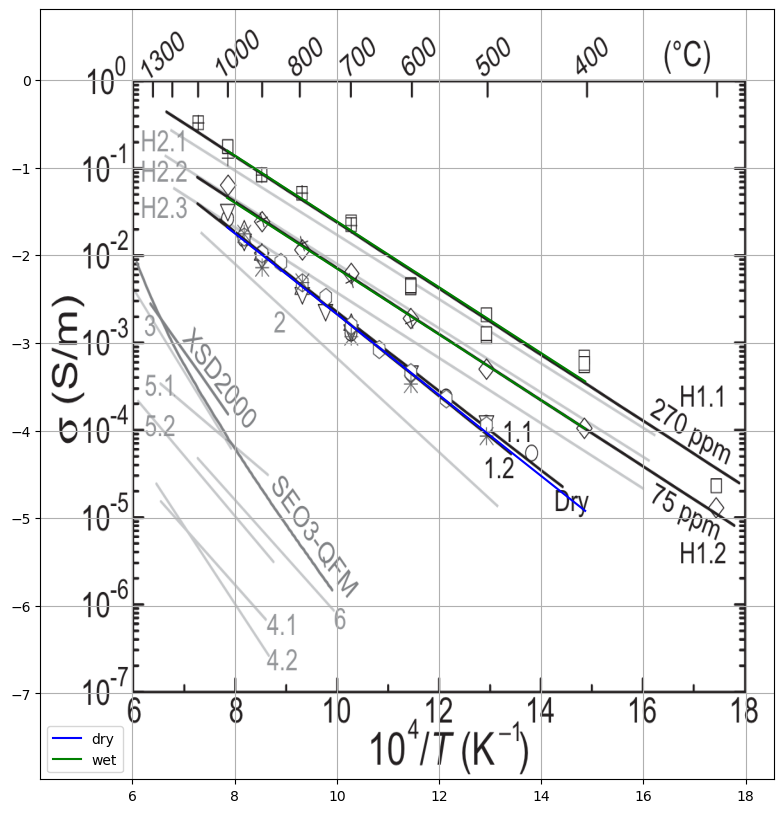

In [10]:
yc_models = ['ymcc_12_dry_cpx',
 'ymcc_12_wet_cpx',]

water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(yc_models[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = pyrutils.calc_QFM(temperature_range,0)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in yc_models:
        ecmodel = ecdatabase.get_model(model_name)
        if 'dry' in model_name:
            c = ecmodel.get_conductivity(T=temperature_range)
            ax.plot(1e4/temperature_range,
            np.log10(c),color='blue')
        else:
            if 'nat' in model_name:
                color='blue'
            else:
                color='green'
            for w in [0, 75, 270]: 
                c = ecmodel.get_conductivity(T=temperature_range,Cw=w)
                ax.plot(1e4/temperature_range,
                np.log10(c),color=color)
plt.plot([],[],color='blue',label='dry')
plt.plot([],[],color='green',label='wet')
#plt.xlim([5,11])
#plt.ylim([-8,0])
plt.legend(loc='lower left')

## Yang X. 2012

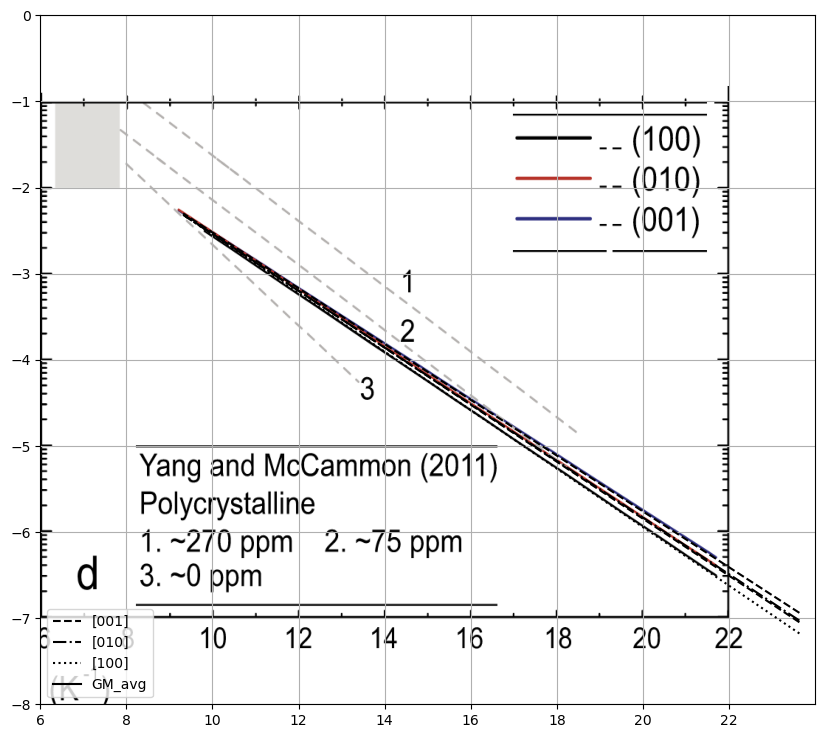

In [14]:
yc_models = ['yang_12b_cpx[100]',
 'yang_12b_cpx[010]',
 'yang_12b_cpx[001]',
'isotropic_model:yang_12b_cpx[100]+yang_12b_cpx[010]+yang_12b_cpx[001]']
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('clinopyroxene')
water =[0,135,890]

ec_model_row = ecdatabase.get_model_properties(yc_models[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i!=1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in yc_models:
        ecmodel = ecdatabase.get_model(model_name)
        if '001' in model_name:
            linestyle='--'
        elif '010' in model_name:
            linestyle='-.'
        elif '100' in model_name:
            linestyle=':'
        elif 'aniso' in model_name:
            linestyle='-'
     
        c = ecmodel.get_conductivity(T=temperature_range)
        ax.plot(1e4/temperature_range,
        np.log10(c),linestyle=linestyle,color='black')

plt.plot([],[],linestyle='--',label='[001]',color='black')
plt.plot([],[],linestyle='-.',label='[010]',color='black')

plt.plot([],[],linestyle=':',label='[100]',color='black')
plt.plot([],[],linestyle='-',label='GM_avg',color='black')
plt.xlim([6,24])
plt.ylim([-8,0])
plt.legend(loc='lower left')